# EE301A Assignment 1
- Use python3
- Submit your "rendered" ipynb, i.e., with outputs of codes (plots and printed values) visible below
- Use only numpy library for computing and signal processing, no other package allowed

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Q1. Downsampling

Generate a triangle wave with time period = T seconds, sampling rate Fs, and length N. Its amplitude should vary between 0 and 1, and both rising and falling should have same slopes (magnitude).
NOTE: signal should start from zero amplitude.(i.e. rising edge should occur first)

In [2]:
def generateTriangle(T, Fs, N):
    '''
    Return: 
        x: numpy array of shape (N,)
    '''
    
    def val(t):
        i = t%T
        if(i<=T/2):
            return 2*i/T
        else:
            return 2*(T-i)/T
    x = np.zeros(N)
    for i in range(N):
        x[i] = val(i/Fs)
    ### WRITE YOUR CODE HERE - 5 MARKS
#     print(len(x))
    return x


Downsample x by a factor M (positive integer)

In [3]:
def downsample(x, M):
    '''
    Return:
        y: numpy array of shape similar to x, but shorter by a factor M
    '''
    t = len(x)//M
    y = np.zeros(t)
    
    for r in range(t):
            y[r] = x[M*r]
    ### WRITE YOUR CODE HERE - 5 MARKS

    return y
# x = generateTriangle(2,10,100)
# print(downsample(x,1))

Plot x vs n

In [4]:
def plot_discrete(x, xlabel='',ylabel=''):
    plt.stem(np.arange(0,len(x)),x)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return

Plot x vs t, using sampling rate Fs

In [5]:
def plot_continuous(x, Fs, xlabel='',ylabel=''):
    Ts=1/Fs
    N = len(x)
    duration_in_s = N*Ts
    plt.plot(np.arange(0,duration_in_s,Ts), x)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return

### Experiment (use the above functions only)
- Consider a signal $x(t)$ which is a triangle wave with time period 0.1s and of total duration of 10 seconds. Sample it at Fs=100Hz. Plot $x(t)$ and $x[n]$. 
- Downsample $x[n]$ by a factor of 2 to get $y[n]$. Plot $y(t)$ and $y[n]$. 
- What is the time period of $y(t)$? (compute manually)

Grading: 10 marks for correct plots and correct value of time period

C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


time period of yt 0.05 seconds


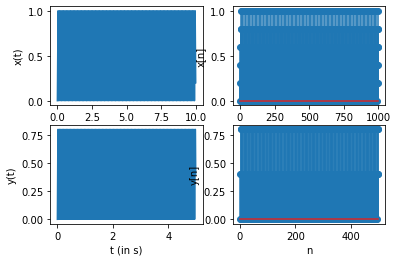

In [6]:
def expt1():
    Fs = 100
    T = 0.1
    xn = generateTriangle(T,Fs,1000)
    yn = downsample(xn,2)

    xt = xn
    yt = yn
    ### WRITE YOUR CODE HERE - 10 MARKS

    ### (the variables you get here will be plotted/printed by lines below)
    T_yt = '0.05 seconds'
    # I found it by reducing the number of sampling points as there as way too many to calculate the time period manually
    plt.subplot(221);plot_continuous(xt, Fs, xlabel='t (in s)', ylabel='x(t)');
    plt.subplot(222);plot_discrete(xn, xlabel='n', ylabel='x[n]');
    plt.subplot(223);plot_continuous(yt, Fs, xlabel='t (in s)', ylabel='y(t)');
    plt.subplot(224);plot_discrete(yn, xlabel='n', ylabel='y[n]');
    print('time period of yt', T_yt) 
    return
if __name__=="__main__":
    expt1()

# Q2. Moving Average Filter

Generate a sine signal x[n] with frequency f Hz, sampled at Fs Hz, and length N

In [7]:
def generateSine(f, Fs, N):
    '''
    Return: 
        x: numpy array of shape (N,)
    '''
    Ts = 1/Fs
    sample = np.arange(0,N*Ts,Ts)
    x = np.sin(2*np.pi*f*sample)
    ### WRITE YOUR CODE HERE - 5 MARKS

    return x

Build a moving average filter of length M. It should be causal. Assume x=0 for n<0;
use same formula as discussed in class.

In [8]:
def filter_MA(x, M):
    '''
    Return:
        y: numpy array of shape similar to x
    '''
    N = len(x)
    y = np.zeros(N)
    for t in range(N):
            for i in range(M):
                if(t-i<0):
                    break
                else:
                    y[t] = y[t] + x[t-i]
            y[t] = y[t]/M
    ### WRITE YOUR CODE HERE - 5 MARKS

    return y

# x1 = generateSine(1,10,20)
# y1 = filter_MA(x1,10)
# print(x1)
# print(y1)

Generate Gaussian noise signal with g[n] ~ $\mathcal{N}(\mu, \sigma)$ of length N 

In [9]:
def noiseGenerator(mu, sigma, N):
    '''
    Return: 
        g: numpy array of shape (N,)
    '''
    g = np.random.normal(mu,sigma,N)
    ### WRITE YOUR CODE HERE - 3 MARKS

    return g

Adder: adds two signal x and g

In [10]:
def adder(x, g):
    '''
    Return:
        y: numpy array with y[n]=x[n]+g[n]
    '''
    y = x + g
    ### WRITE YOUR CODE HERE - 2 MARKS

    return y

### Experiment (use the above functions only)
- Construct a signal $x(t)$ with frequency 10 Hz of duration 0.5s. Sample it at 100Hz to get $x[n]$. Plot $x[n]$
- Generate random noise $g[n] ~ \mathcal{N}(0,0.3)$. Plot $g[n]$
- Add noise to the signal. Plot the mixture $y[n]$
- Pass y[n] through a moving average filter with M=4. Plot its output $z[n]$. Note that it looks more like $x[n]$, i.e. clean signal.

Grading: 10 marks for correct plots

C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


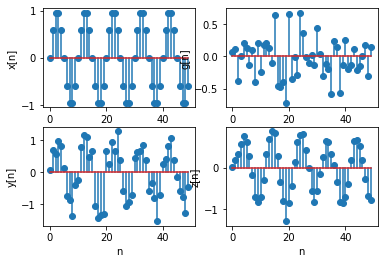

In [11]:
def expt2():

    ### WRITE YOUR CODE HERE - 10 MARKS
    f = 10
    Fs = 100
    N = 50
    mu = 0
    sigma = 0.3
    M = 4
    xn = generateSine(f,Fs,N)
    gn = noiseGenerator(mu,sigma,N)
    yn = adder(xn,gn)
    zn = filter_MA(yn,M)
    ### WRITE YOUR CODE HERE (the variables you get here will be plotted/printed by lines below)
    
    plt.subplot(221);plot_discrete(xn, xlabel='n', ylabel='x[n]')
    plt.subplot(222);plot_discrete(gn, xlabel='n', ylabel='g[n]')
    plt.subplot(223);plot_discrete(yn, xlabel='n', ylabel='y[n]')
    plt.subplot(224);plot_discrete(zn, xlabel='n', ylabel='z[n]')
    return
if __name__=="__main__":
    expt2()

# Q3. Frequency Estimation

Generate a frequency modulated signal x[n], which is $x(t)=\sin(2\pi f(t)t)$ with $f(t)=f_1+0.1\sin(2\pi f_2 t)$, sampled at a rate Fs and of length N.

In [12]:
def generate_FM(f1, f2, Fs, N):
    '''
    Return: 
        x: numpy array of shape (N,)
    '''
    Ts = 1/Fs
    sample = np.arange(0,N*Ts,Ts)
    sample1 = np.sin(2*np.pi*f2*sample)
    for i in range(N):
        sample1[i] *= 0.1
        sample1[i] += f1
    x = np.sin(2*np.pi*sample1*sample)
    ### WRITE YOUR CODE HERE - 5 MARKS

    return x
# generate_FM(10,100,100,100)

Extract window: Given a signal x[n], take small windows of size W seconds with a hop or shift of H seconds. Use Fs as sampling rate. Return i'th window

In [13]:
def extractWindow(x, W, H, Fs, i):
    '''
    Return: 
        xw: num
        py array of shape similar to x, but truncated
    '''
    Ts = 1/Fs
    xw = np.zeros(0)
    for t in range(len(x)):
        if(t*Ts<=((i-1)*H+W) and t*Ts>=(i-1)*H):
            xw = np.insert(xw,len(xw),x[t])
#             xw.append(x[t])
                
    ### WRITE YOUR CODE HERE - 5 MARKS

    return xw
# y = generate_FM(10,100,100,100)
# print(y)
# extractWindow(y,0.1,0.2,100,2)

Estimate the fundamental frequency F0 of x[n] in Hz, taking the sampling rate as Fs.
1. Use autocorrelation function
2. Use difference function

In [14]:
def estimateF0_autocorr(x, Fs):
    F0_Hz = 0
    n = 0
    N = len(x)
    prev = 0
    def auto(x,l):
        s = 0
        for i in range(N-l):
            s += x[i]*x[i+l]
        return s
    
    for i in range(1,N-2,1):
        if(auto(x,i)>auto(x,i-1) and auto(x,i)>auto(x,i+1)):
            if(auto(x,i)>prev):
                prev = auto(x,i)
                n = i
    if(n==0):
        return F0_Hz
    F0_Hz = Fs/n
    ### WRITE YOUR CODE HERE - 10 MARKS

    return F0_Hz

In [15]:
def estimateF0_diff(x, Fs):
    F0_Hz = 0
    n = 0
    N = len(x)
    def sq_diff(x,l):
        s = 0;
        for i in range(N-l):
            s += (x[i]-x[i+l])*(x[i]-x[i+l])
        return s
    for i in range(1,N-1,1):
        if(sq_diff(x,i)<sq_diff(x,i-1) and sq_diff(x,i)<sq_diff(x,i+1)):
                n = i
                break
            
    ### WRITE YOUR CODE HERE - 10 MARKS
    if(n==0):
        return F0_Hz
    F0_Hz = Fs/n
    return F0_Hz
y=np.array([1,2,3,1,2,3,1,2,3])

# y = generateSine(1,10,200)
# p = estimateF0_autocorr(y,10)
# q = estimateF0_diff(y,10)
# print(p)
# print(q)

### Experiment (use the above defined functions only)
- Generate an FM signal with f1=1Hz and f2=0.1Hz. Use Fs=20Hz for duration of 5 secs. Plot $x[n]$
- $x[n]$ is a quasi-stationary signal. Take small windows with W=2s and H=1s. Estimate F0 for each window using autocorrelation function. Plot F0_autocorr vs t.
- Repeat F0 estimation using difference function. Plot F0_diff vs t.

[ 0.          0.30995534  0.59097244  0.81419847  0.95580533  0.99969811
  0.93955096  0.77989972  0.53610478  0.23311177 -0.09692813 -0.41797824
 -0.69404909 -0.89331853 -0.99196004 -0.97720242 -0.84920674 -0.62146687
 -0.31960786  0.02134814  0.36097798  0.65826764  0.8766595   0.98869971
  0.97967187  0.84971049  0.61406852  0.30144813 -0.04944015 -0.39468118
 -0.69071732 -0.89994696 -0.99561647 -0.96534486 -0.81279617 -0.55726101
 -0.2311911   0.12399043  0.46324517  0.74372649  0.93026441]
[ 0.36097798  0.65826764  0.8766595   0.98869971  0.97967187  0.84971049
  0.61406852  0.30144813 -0.04944015 -0.39468118 -0.69071732 -0.89994696
 -0.99561647 -0.96534486 -0.81279617 -0.55726101 -0.2311911   0.12399043
  0.46324517  0.74372649  0.93026441  0.99980541  0.94423343  0.77122524
  0.50306293  0.17360081 -0.17617593 -0.50339011 -0.7686131  -0.9406232
 -1.         -0.94114828 -0.77256403 -0.51538793 -0.20050431  0.13538954
  0.45421683  0.7209027   0.90719153  0.99449118  0.9754804 ]
[

C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


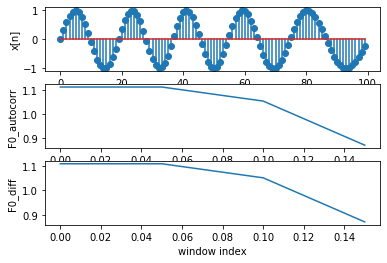

In [17]:
def expt3():

    ### WRITE YOUR CODE HERE - 10 MARKS
    f1 = 1
    f2 = 0.1
    Fs = 20
    N = 100
    xn = generate_FM(f1,f2,Fs,N)
    W = 2
    H = 1
    F0_autocorr = np.zeros(4)
    F0_diff = np.zeros(4)
    for i in range(1,5):
        y = extractWindow(xn, W, H, Fs, i)
        print(y)
        F0_autocorr[i-1] = estimateF0_autocorr(y, Fs)
        F0_diff[i-1] = estimateF0_diff(y, Fs)
    ### WRITE YOUR CODE HERE (the variables you get here will be plotted/printed by lines below)
#     print(F0_autocorr)
#     print(F0_diff)
    plt.subplot(311);plot_discrete(xn, xlabel='n', ylabel='x[n]');
    plt.subplot(312);plot_continuous(F0_autocorr,Fs, xlabel='window index',ylabel='F0_autocorr');
    plt.subplot(313);plot_continuous(F0_diff,Fs, xlabel='window index',ylabel='F0_diff');
   
    return
if __name__=="__main__":
    expt3()